<a href="https://colab.research.google.com/github/nnquangw/DevC-DataScience24-Assigments/blob/master/Assignment_3_EDA_NNQuang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
retail = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv', encoding ='latin1')

In [28]:
# Print out First 5 rows from dataframe
# Your code here
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [29]:
# Print out brief info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [30]:
# Your code here
retail.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

**Examine few examples of NaN values**

In [34]:
# List all NaN values
retail[retail.isna().any(axis=1)].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
370802,569202,82613D,METAL SIGN CUPCAKE SINGLE HOOK,1,9/30/11 17:22,2.46,NaN,United Kingdom
50654,540551,84970S,HANGING HEART ZINC T-LIGHT HOLDER,2,1/10/11 9:43,2.13,NaN,United Kingdom
287507,562104,23207,LUNCH BAG ALPHABET DESIGN,1,8/2/11 14:31,4.96,NaN,United Kingdom
318919,564838,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,8/30/11 12:43,6.23,NaN,United Kingdom
161997,550496,22819,"BIRTHDAY CARD, RETRO SPOT",1,4/18/11 15:05,0.83,NaN,United Kingdom
129393,547385,85150,LADIES & GENTLEMEN METAL SIGN,1,3/22/11 15:48,4.96,NaN,United Kingdom
324220,565396,22422,TOOTHPASTE TUBE PEN,1,9/2/11 16:39,1.25,NaN,United Kingdom
496007,578344,21718,RED METAL BEACH SPADE,1,11/24/11 9:21,2.46,NaN,United Kingdom
23765,538247,79067,NaN,-145,12/10/10 12:09,0.00,NaN,United Kingdom
250967,559051,84978,HANGING HEART JAR T-LIGHT HOLDER,22,7/5/11 16:47,2.46,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
retail.drop(retail[retail['Quantity'] < 0].index, inplace=True)

**Exclude negative Price entries**

In [0]:
retail.drop(retail[retail['UnitPrice'] < 0].index, inplace=True)

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [112]:
# Your code here
# get customers from 'United Kingdom' and groupby CustomerID then count
uk_order = retail[retail.Country == 'United Kingdom'].groupby(['CustomerID'])
# get 10 customers with the highest number of orders
print(uk_order.count().sort_values(by='InvoiceNo', ascending=False)['InvoiceNo'].head(10))

CustomerID
17841.0    7983
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
13089.0    1857
13263.0    1677
14298.0    1640
15039.0    1508
18118.0    1284
Name: InvoiceNo, dtype: int64


**The customer with the highest money spent on purchases comes from Netherlands**

In [0]:
# add 'Total cost' to retail dataframe
retail['Total cost'] = retail['Quantity'] * retail['UnitPrice']

In [86]:
# Your code here
# get customer from 'Netherlands'
nth_order = retail[retail.Country == 'Netherlands'].groupby(['CustomerID']).sum()

# get 10 customers with the highest number of orders 
nth_customers = nth_customers.sort_values(by='Total cost', ascending=False)
print(nth_customers['Total cost'].head(10))

CustomerID
14646.0    279489.02
12759.0      1531.44
12775.0      1351.24
12778.0       804.23
12787.0       463.66
12802.0       412.58
12790.0       324.92
12791.0       192.60
12789.0        91.85
Name: Total cost, dtype: float64


**On which year had the highest sales?**

In [87]:
# Your code here
# get month, day, year, hour, minute from 'InvoiceDate' column
timedate = retail['InvoiceDate']
timedate = pd.to_datetime(timedate, format='%m/%d/%y %H:%M')

# add 'Year', 'YearMonth' column to retail dataframe
retail['Year'] = timedate.dt.year
retail['YearMonth'] = timedate.map(lambda x: 100*x.year + x.month)

# group by 'Year' and sum 'Total cost' to get the highest sales
year_sales = retail.groupby(['Year']).sum()
print(year_sales.sort_values(by='Total cost', ascending=False)['Total cost'].head(1))

Year
2011    8.998791e+06
Name: Total cost, dtype: float64


**How many orders (per hour)?**

In [94]:
retail['Hour'] = timedate.dt.hour
# groupby 'Hour'
hour_order = retail.groupby(['Hour']).count()
# most orders descending order
print(hour_order.sort_values(by='InvoiceNo', ascending=False)['InvoiceNo'])

Hour
12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
9     34332
17    28509
8      8909
18     7974
19     3705
20      871
7       383
6        41
Name: InvoiceNo, dtype: int64


**Make a plot about number of orders per hour**

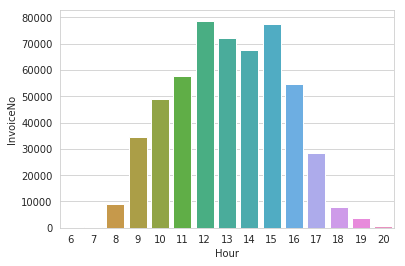

In [95]:
hour_plot = retail.groupby(['Hour'], as_index=False).count()
sns.barplot(x="Hour", y="InvoiceNo", data=hour_plot)

**How many orders (per month)?**

In [99]:
retail['Month'] = timedate.dt.month
# groupby 'Month'
month_order = retail.groupby(['Year', 'Month']).count()
# most orders descending order
print(month_order.sort_values(by='InvoiceNo', ascending=False)['InvoiceNo'])

Year  Month
2011  11       84711
      10       60742
      9        50226
2010  12       42481
2011  7        39518
      5        37030
      6        36874
      3        36748
      8        35284
      1        35147
      4        29916
      2        27707
      12       25525
Name: InvoiceNo, dtype: int64


**Make a plot about number of orders per month**

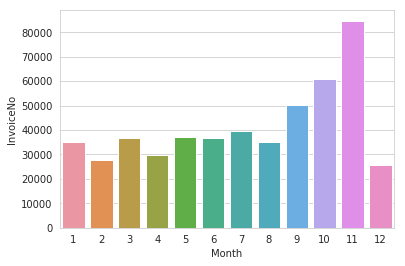

In [102]:
# groupby 'Month' in 2011 and plot
month_plot_2011 = retail[retail['Year']==2011].groupby(['Month'], as_index=False).count()
sns.barplot(x="Month", y="InvoiceNo", data=month_plot_2011)

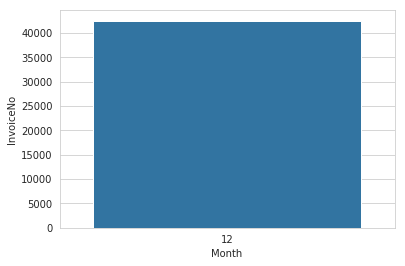

In [103]:
# groupby 'Month' in 2010 and plot
month_plot_2010 = retail[retail['Year']==2010].groupby(['Month'], as_index=False).count()
sns.barplot(x="Month", y="InvoiceNo", data=month_plot_2010)

**Top 10 items most sales**

In [110]:
# Top 10 items most sales in Invoices
# groupby 'StockCode' and 'Description'
most_invoice_sales = retail.groupby(['StockCode', 'Description']).count()
# descending sort order to get top 10
print(most_invoice_sales.sort_values(by='InvoiceNo', ascending=False)['InvoiceNo'].head(10))

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2302
22423      REGENCY CAKESTAND 3 TIER              2200
85099B     JUMBO BAG RED RETROSPOT               2159
47566      PARTY BUNTING                         1727
20725      LUNCH BAG RED RETROSPOT               1638
84879      ASSORTED COLOUR BIRD ORNAMENT         1501
22720      SET OF 3 CAKE TINS PANTRY DESIGN      1473
21212      PACK OF 72 RETROSPOT CAKE CASES       1385
20727      LUNCH BAG  BLACK SKULL.               1350
22457      NATURAL SLATE HEART CHALKBOARD        1280
Name: InvoiceNo, dtype: int64


In [111]:
# Top 10 items most sales in Quantity
# groupby 'StockCode' and 'Description'
most_quantity_sales = retail.groupby(['StockCode', 'Description']).sum()
# descending sort order to get top 10
print(most_quantity_sales.sort_values(by='Quantity', ascending=False)['Quantity'].head(10))

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
85099B     JUMBO BAG RED RETROSPOT               47363
84879      ASSORTED COLOUR BIRD ORNAMENT         36381
22197      POPCORN HOLDER                        36334
21212      PACK OF 72 RETROSPOT CAKE CASES       36039
85123A     WHITE HANGING HEART T-LIGHT HOLDER    35025
23084      RABBIT NIGHT LIGHT                    30680
22492      MINI PAINT SET VINTAGE                26437
22616      PACK OF 12 LONDON TISSUES             26315
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

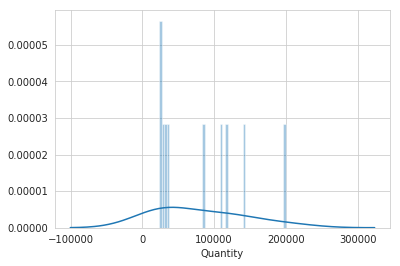

In [144]:
# Your code here
# get rid of UK and groupby 'Country'
histo = retail[retail['Country'] != 'United Kingdom'].groupby(by=['Country'], as_index=False)
# get 10 countries that has most 'Quantity'
histo_plot = histo.sum().sort_values(by='Quantity', ascending=False).head(10)

# plot them


sns.distplot(histo_plot['Quantity'],bins=50)
# What can you tell about this?
#  - Most of them have quantities below 50000 while the maximum quantity is approximately 200000

### You are awesome!!